# In this notebook, we plot various vizualization of our data.

In [1]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Data.csv') #loading data

In [2]:
data.head()

,SPLocation,Beach Number,County,County Number,Region Number,Date,Year,Month,Day,DayofYear,...,Precipitation1d,Precipitation2d,Precipitation3d,Precipitation4d,Precipitation5d,Precipitation6d,Precipitation7d,Population,DaysSinceStorm,SeasonalPopulation
0,BEACH DRIVE,44,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
1,BECKRICH RD,45,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
2,BID-A-WEE BEACH,46,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
3,CARL GRAY PARK,47,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0
4,DELWOOD,48,Bay,5,1,2000-08-03,2000,8,3,243,...,0.14,0.36,0.08,1.02,0.0,0.0,0.78,148217.0,-1,296434.0


In [3]:
data.columns

Index(['SPLocation', 'Beach Number', 'County', 'County Number',
       'Region Number', 'Date', 'Year', 'Month', 'Day', 'DayofYear', 'Weather',
       'WaterTemp', 'AirTemp', 'RainFall24h', 'RainFall3d', 'RainLastWeek',
       'enterococcus', 'Pollution', 'Precipitation', 'MaxTemp', 'MaxTemp1d',
       'MaxTemp2d', 'MaxTemp3d', 'MaxTemp4d', 'MaxTemp5d', 'MaxTemp6d',
       'MaxTemp7d', 'Precipitation1d', 'Precipitation2d', 'Precipitation3d',
       'Precipitation4d', 'Precipitation5d', 'Precipitation6d',
       'Precipitation7d', 'Population', 'DaysSinceStorm',
       'SeasonalPopulation'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170521 entries, 0 to 170520
Data columns (total 37 columns):
SPLocation            170521 non-null object
Beach Number          170521 non-null int64
County                170521 non-null object
County Number         170521 non-null int64
Region Number         170521 non-null int64
Date                  170521 non-null object
Year                  170521 non-null int64
Month                 170521 non-null int64
Day                   170521 non-null int64
DayofYear             170521 non-null int64
Weather               170521 non-null float64
WaterTemp             170521 non-null float64
AirTemp               170521 non-null float64
RainFall24h           170521 non-null float64
RainFall3d            170521 non-null float64
RainLastWeek          170521 non-null float64
enterococcus          170521 non-null int64
Pollution             170521 non-null int64
Precipitation         170521 non-null float64
MaxTemp               170521 non-nul

# 1. No swimming

Florida Health Department issues a "No swimming" advisory on any beach that is detected to be polluted (enterococcus level>70 colonies in 100 ml water). Below we plot the number of pollution events in each year.

Text(0, 0.5, 'Year')

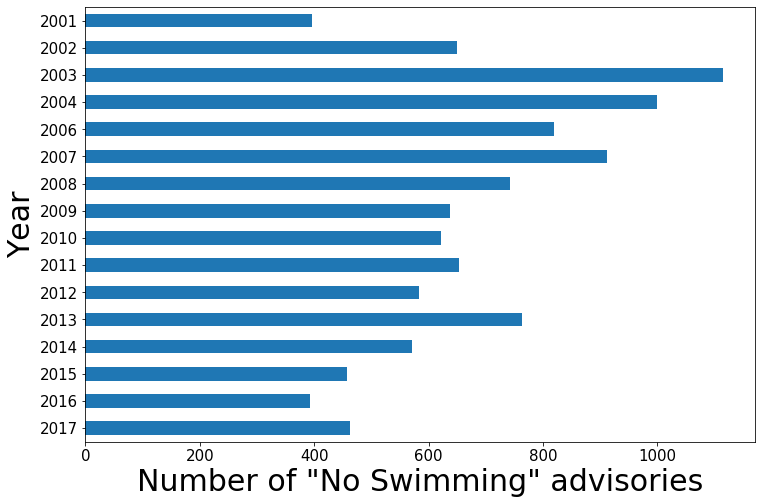

In [5]:
#This code will create a plot that shoes the number of "No swimming" advisories (bacteria level > 70) 
#for years 2001-2017
plt.rcParams['figure.figsize']=(12,8) #plot size
data[data['Year'] > 2000].groupby('Year').Pollution.sum().sort_index(ascending=False).plot(kind='barh', fontsize=15)
plt.xlabel('Number of "No Swimming" advisories', size = 30)#setting and sizing x label
plt.ylabel('Year', size = 30)#setting and sizing y label

In [6]:
#The average number of advisories over 16 years is 674
data[data['Year'] > 2000].Pollution.sum()/data[data['Year'] > 2000].Year.nunique()

673.5

The last line of code shows that the average number of "No swimming" advisories is 674/year.

# 2. Pollution events by month

Below we create two plots. The first plot shows the average number of pollution events for each month (numbered 1 through 12) over 17 years, whereas the second one shows the total number of pollution events for each month.

Both plots suggest that pollution events are more frequent over the summer. This might be due to high air temperatures and high population during the summer months.

Text(0.5, 0, 'Average Number of Pollution Events')

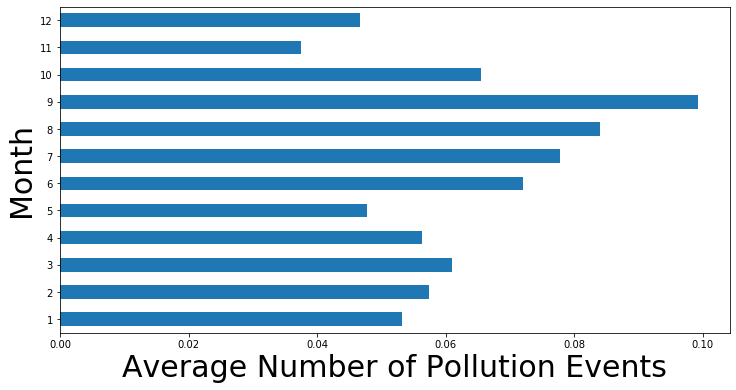

In [7]:
plt.rcParams['figure.figsize']=(12,6)
data.groupby('Month').Pollution.mean().plot(kind = 'barh')
plt.ylabel('Month', size = 30)
plt.xlabel('Average Number of Pollution Events', size = 30)

Text(0.5, 0, 'Total Number of Pollution Events')

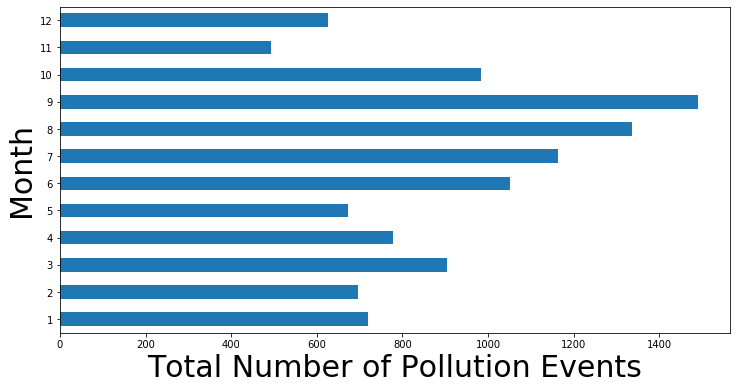

In [8]:
plt.rcParams['figure.figsize']=(12,6)
data.groupby('Month').Pollution.sum().plot(kind = 'barh')
plt.ylabel('Month', size = 30)
plt.xlabel('Total Number of Pollution Events', size = 30)

# 3. Pollution events by county

The following plot depicts the pollution frequency for each county. It is apparent that pollution varies highly by county.

Text(0.5, 1.0, 'Pollution frequency by county\n')

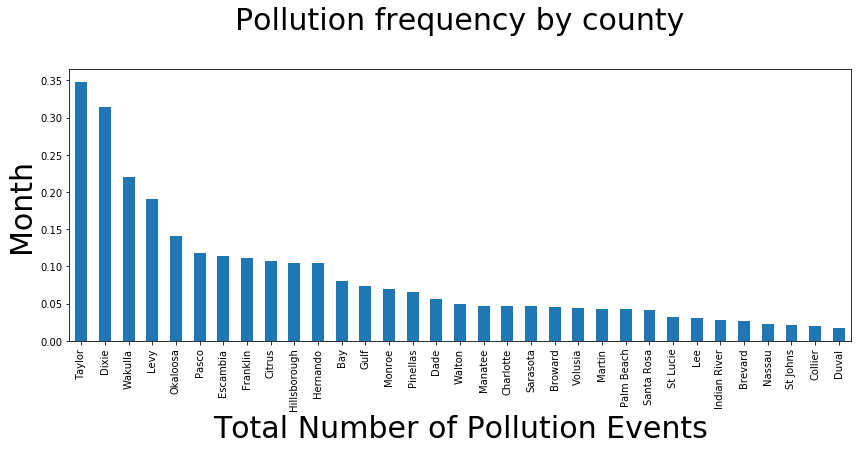

In [9]:
plt.rcParams['figure.figsize']=(14,5)
data.groupby('County').Pollution.mean().sort_values(ascending = False).plot(kind = 'bar')
plt.ylabel('Month', size = 30)
plt.xlabel('Total Number of Pollution Events', size = 30)
plt.title('Pollution frequency by county\n', size = 30)

# 4. More rainfall before pollution events

The following code generates three bar plots, which show the average rainfall within 1d, 3d, and 7d before the tests. Apperantly, pollution events follow after higher precipitation, which indicates a positive correlation between rain and pollution.

Text(0, 0.5, 'Rain within last 7d (mm)')

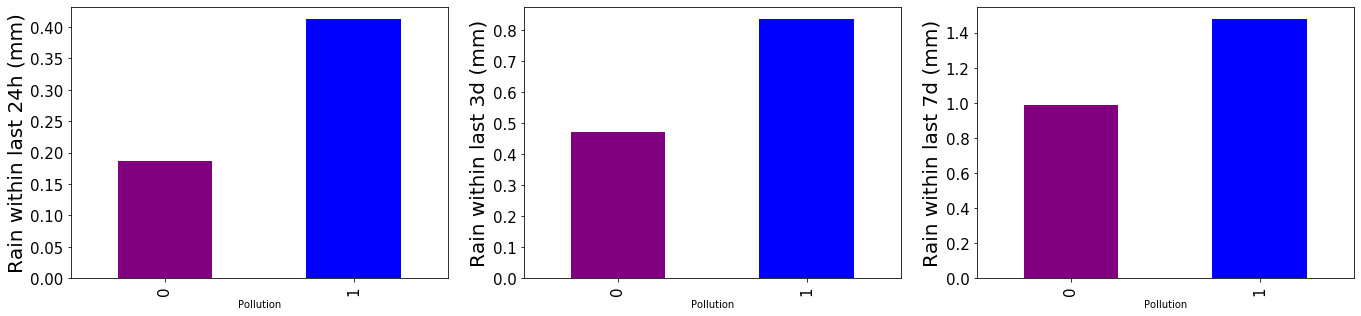

In [10]:
my_colors = ['purple', 'blue']
plt.rcParams['figure.figsize']=(23,5) #adjusting plot size
fig, ax =plt.subplots(1,3) #there will be three plots horizontally aligned
data.groupby('Pollution').RainFall24h.mean().sort_index().plot(kind='bar', color = my_colors, fontsize=15, ax = ax[0]).set_ylabel('Rain within last 24h (mm)', size =20)
data.groupby('Pollution').RainFall3d.mean().sort_index().plot(kind='bar', color = my_colors, fontsize=15, ax = ax[1]).set_ylabel('Rain within last 3d (mm)', size =20)
data.groupby('Pollution').RainLastWeek.mean().sort_index().plot(kind='bar', color = my_colors, fontsize=15, ax = ax[2]).set_ylabel('Rain within last 7d (mm)', size =20)

# 5. Bacteria level by beaches

Now we generate two density plots, which compare bacteria level densities for different sets of beaches. The plots suggest that the bacteria level varies highly by location.

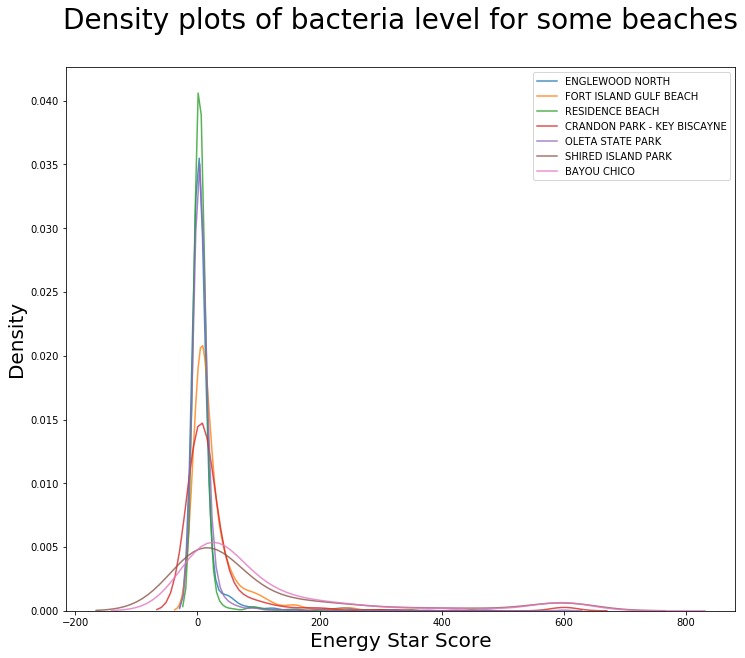

In [11]:
plt.rcParams['figure.figsize']=(12,10)

for b in data.SPLocation.unique()[30:70:6]:
    #print(b)
    subset = data[data['SPLocation'] == b]
    
    sns.kdeplot(subset[subset['enterococcus']<800].enterococcus,
               label = b, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20);
plt.title('Density plots of bacteria level for some beaches\n ', size = 28);

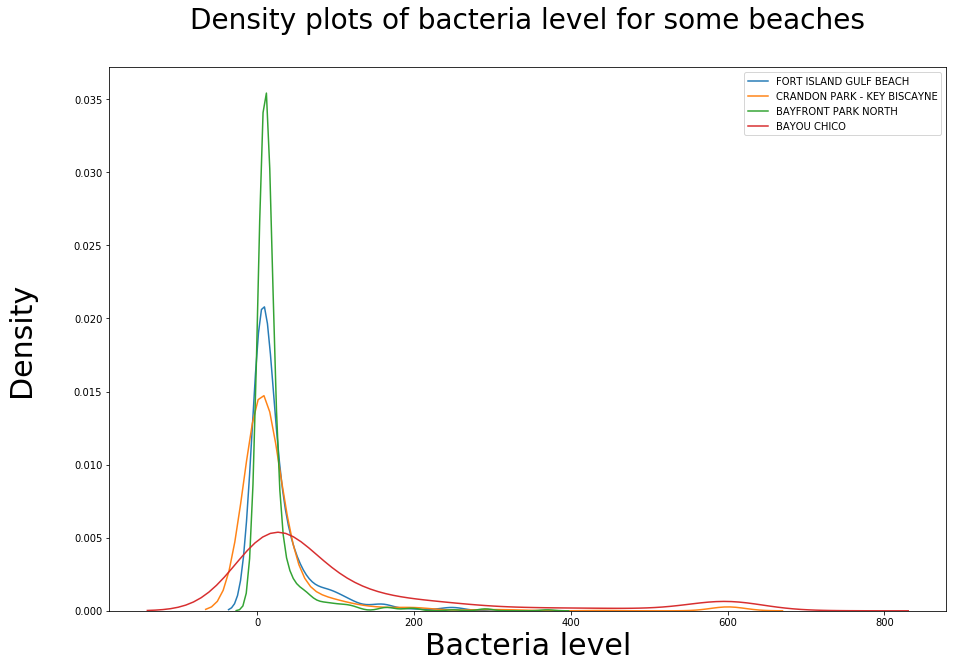

In [12]:
lst = [
'FORT ISLAND GULF BEACH',
'CRANDON PARK - KEY BISCAYNE',
'BAYFRONT PARK NORTH',
    'BAYOU CHICO'
]
plt.rcParams['figure.figsize']=(15,10)
for b in lst:
    subset = data[data['SPLocation'] == b]
    
    sns.kdeplot(subset[subset['enterococcus']<800].enterococcus,
               label = b, shade = False, alpha = 10);
    
# label the plot
plt.xlabel('Bacteria level', size = 30); 
plt.ylabel('Density\n ', size = 30);
plt.title('Density plots of bacteria level for some beaches\n ', size = 28);

# 6. Water temperature vs air temperature

Now we create two plots, which compare the air temperature and the water temperature before pollution events and unpollution events.

Text(0.5, 1.0, 'Water vs Air Temperature\nduring pollution events')

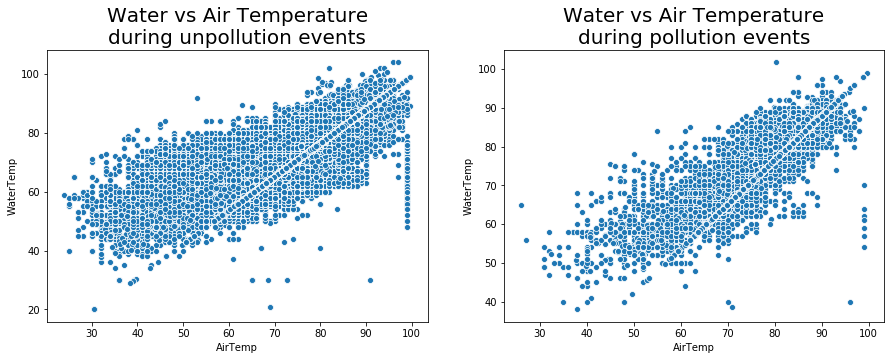

In [13]:
d = data[data.AirTemp <100]
plt.rcParams['figure.figsize']=(15,5) #adjusting plot size
fig, ax =plt.subplots(1,2) #there will be two plots horizontally aligned
sns.scatterplot( x = 'AirTemp', y='WaterTemp',data = d[d['Pollution'] == 0], ax = ax[0]).set_title('Water vs Air Temperature\nduring unpollution events', size =20)
sns.scatterplot( x = 'AirTemp', y='WaterTemp',data = d[d['Pollution'] == 1], ax = ax[1]).set_title('Water vs Air Temperature\nduring pollution events', size =20)

The two plots tell us that the relationship between air temperature and water temperature are quite different during pollution and unpollution events. More precisely, 

- The figure on the left shows that unpollution events tend to happen when water temperature is higher than air temperature.

- The figure on the right shows that pollution events tend to happen when water temperature is lower than the air temperature.

Note that we do not claim any causation here. 

Pollution is known to be more frequent over the summer, which is a timeframe when air temperature beats the water temperature. Higher pollution rate over the summer might be due to various reasons, such as high population. In that case, the last two plots would only imply a correlation between the pollution event and the event that water tempertaure is lower than air temperature.